# Object Oriented Programming - Classes

- Classes provide a means of bundling data and functionality together. 
- Creating a new class creates a new type of object, allowing new instances of that type to be made. 
- Each class instance can have attributes attached to it for maintaining its state. 
- Class instances can also have methods (defined by its class) for modifying its state.



In [33]:
#The simplest form of class definition looks like this:

class ClassName:
    <statement-1>
    .
    .
    .
    <statement-N>

SyntaxError: invalid syntax (2253895616.py, line 4)

### Class Objects

Class objects support two kinds of operations:
- attribute references
- instantiation

*Attribute references* use the standard syntax used for all attribute references in Python: obj.name. 
So, if the class definition looked like this:



In [ ]:
class MyClass:
    """A simple example class"""
    i = 12345

    def f(self):
        return 'hello world'

then MyClass.i and MyClass.f are valid attribute references, returning an integer and a function object, respectively. 
- Class attributes can also be assigned to.
- __ doc__ is also a valid attribute, returning the docstring belonging to the class.

In [ ]:
MyClass.i

12345

In [ ]:
MyClass.f

<function __main__.MyClass.f(self)>

In [ ]:
MyClass.__doc__

'A simple example class'

Class *instantiation* uses function notation. For example 

In [ ]:
x = MyClass()

creates a new *instance* of the class and assigns this object to the variable x.

- The instantiation operation (“calling” a class object) creates an empty object. 
- Many classes like to create objects with instances customized to a specific initial state. 
- A class may define a special method named __ init__() to define the initial state:

In [ ]:
class MyClass:
    """A simple example class"""
    i = 12345

    def __init__(self):
        self.data = []

    def f(self):
        return 'hello world'

When a class defines an __ init__() method, class instantiation automatically invokes __ init__() for the newly created class instance. 

For greater flexibility, arguments given to the class instantiation operator are passed on to __ init__():

In [ ]:
class Complex:
    def __init__(self, realpart, imagpart):
        self.r = realpart
        self.i = imagpart

z = Complex(3.0, -4.5)
z.r, z.i

(3.0, -4.5)

### Instance Objects

The only operations understood by instance objects are attribute references. 
There are two kinds of valid attribute names:
- data attributes
- methods

Data attributes need not be declared; like local variables, they spring into existence when they are first assigned to:

In [ ]:
x.counter = 1
while x.counter < 10:
    x.counter = x.counter * 2
print(x.counter) # returns 16
del x.counter # deletes data attribute

16


A method is a function that “belongs to” an object.
By definition, all attributes of a class that are function objects define corresponding methods of its instances.
- x.f is a valid method reference, since MyClass.f is a function
- But x.f is not the same thing as MyClass.f — x.f is a method object, not a function object.

In [ ]:
type(MyClass.f)

function

In [ ]:
type(x.f)

method

### Method Objects

Usually, a method is called right after it is bound:

In [ ]:
x.f()

'hello world'

x.f() was called without an argument above, even though the function definition for f() specified an argument. 
- the special thing about methods is that the instance object is passed as the first argument of the function.
- the call x.f() is exactly equivalent to MyClass.f(x)

### Class and Instance Variables

Generally speaking, 
- instance variables are unique to each instance and 
- class variables are shared by all instances of the class:

In [ ]:
class Dog:

    kind = 'canine'         # class variable shared by all instances

    def __init__(self, name):
        self.name = name    # instance variable unique to each instance

d = Dog('Fido')
e = Dog('Buddy')

In [ ]:
d.kind

'canine'

In [ ]:
e.kind

'canine'

In [ ]:
d.name

'Fido'

In [ ]:
e.name

'Buddy'

shared data can have possibly surprising effects with involving mutable objects such as lists and dictionaries:

In [ ]:
class Dog:

    tricks = []             # mistaken use of a class variable

    def __init__(self, name):
        self.name = name

    def add_trick(self, trick):
        self.tricks.append(trick)

d = Dog('Fido')
e = Dog('Buddy')
d.add_trick('roll over')
e.add_trick('play dead')
d.tricks

['roll over', 'play dead']

Correct design of the class should use an instance variable instead:

In [ ]:
class Dog:

    def __init__(self, name):
        self.name = name
        self.tricks = []    # creates a new empty list for each dog

    def add_trick(self, trick):
        self.tricks.append(trick)

d = Dog('Fido')
e = Dog('Buddy')
d.add_trick('roll over')
e.add_trick('play dead')
d.tricks

['roll over']

# A Pythonic Object

## Special Methods
Special methods (magic or dunder(double-underscore) methods) effect an object’s high level behavior and its interactions with operators. 

- __ init__ is an example of a special method; recall that it controls the process of creating instances of a class. 
- __ add__ controls the behavior of an object when it is operated on by the + symbol.



In [ ]:
# Demonstrating (mis)use of special methods
class SillyClass:
    def __getitem__(self, key):
        """ Determines behavior of `self[key]` """
        return [True, False, True, False]

    def __pow__(self, other):
        """ Determines behavior of `self ** other` """
        return "Python Like You Mean It"

silly = SillyClass()
print(silly['bla'])
silly ** 2

[True, False, True, False]


'Python Like You Mean It'

Your application class probably don't need and should not implement as many special methods.
- But if you write a lib or a framework, the programmers who will use them may expect them to behave like the classes that python provides.
- Fulfilling that expectation is one way of being "Pythonic".


# Custom Vector Class

In order to demonstrate the many methods used to generate object representations, we will implement a 2 dimensional Vector class: *Vector2d* 

In [ ]:
import math

class Vector2d:

    def __init__(self, x, y):   #constructor
        self.x = float(x)       # converting x an y to floats catches errors early
        self.y = float(y)

    def __repr__(self):        # string representation in console 
        class_name = type(self).__name__
        return f"{class_name}({self.x} {self.y})"

    def __str__(self):
        return str((self.x, self.y))

    def __eq__(self, other):
        return (self.x, self.y) == (other.x, other.y)
    
    def __abs__(self):
        return math.hypot(self.x, self.y)

    def __bool__(self):
        return bool(abs(self))

    def angle(self):
        rad = math.atan2(self.y, self.x)
        return math.degrees(rad)

In [ ]:
v1 = Vector2d(1,2)
print(v1)   #string representation; it's what you get when you print an object
v2 = Vector2d(4,3)
print(v2)
v1 == v2

abs(v2)
bool(v2)

v3 = Vector2d(0,0)
bool(v3)

v4 = Vector2d(-1,0)
v4.angle()


(1.0, 2.0)
(4.0, 3.0)


180.0

## classmethod Versus staticmethod

- classmethod decorator changes the way the method is called, so it receives the class itself as the first argument, instead of an instance. Its most common use is for alternative constructors
- in contrast, the staticmethod decorator changes a method so that it receives no special first argument.
- in essence, a static method is just like a plain function that happens to live in a a class body, instead of being defined at the module level

In [ ]:
class Demo:
    @classmethod
    def klassmeth(args):
        return args
    
    @staticmethod #good usecases are rare
    def statmeth(args):
        return args

print(Demo.klassmeth())
print(Demo.statmeth('bla'))

<class '__main__.Demo'>
bla


In [ ]:
class Person:
    def __init__(self, fname, lname) -> None:
        self.fname = fname
        self.lname = lname

    def __repr__(self) -> str:
        return f"{self.fname} {self.lname}"

    @classmethod
    def get_names(cls, fullname):
        fname, lname = fullname.split(' ')
        return cls(fname, lname)

p1 = Person('John', 'Doe')

p1

p2 = Person.get_names('Peter Pan')
p2


Peter Pan

In [ ]:
class MyClass:
    """A simple example class"""
    i = 12345

    def __init__(self): #Constructor
        self.data = ['nl']

    def f(self, item):
        self.data.append(item)
        print(self.data)
        return "Hello World"

    @classmethod
    def change_i(cls):
        cls.i = 333
        return cls()

x = MyClass.change_i()
x.i

333

## A Hashable Vector2d

As defined, so far our Vector2d instances are unhashable:

In [ ]:
v1 = Vector2d(1,2)
hash(v1)

TypeError: unhashable type: 'Vector2d'

- special method __ hash__
- Vector instances must be immutable

In [ ]:
class Vector2d:

    def __init__(self, x, y):   
        self.__x = float(x)       # underscores make attribute private
        self.__y = float(y)

    @property  #marks the getter method of a property
    def x(self): # named after the public property it exposes: x
        return self.__x

    @property  #marks the getter method of a property
    def y(self): # named after the public property it exposes: x
        return self.__y

    def __repr__(self):        # string representation in console 
        class_name = type(self).__name__
        return f"{class_name}({self.x} {self.y})"

    def __str__(self):
        return str((self.x, self.y))

    def __eq__(self, other):
        return (self.x, self.y) == (other.x, other.y)
    
    def __abs__(self):
        return math.hypot(self.x, self.y)

    def __bool__(self):
        return bool(abs(self))

    def angle(self):
        rad = math.atan2(self.y, self.x)
        return math.degrees(rad)

    def __hash__(self):
        return hash((self.x, self.y))

In [ ]:
v1 = Vector2d(1,1)
v2 = Vector2d(1.2,1)
v2d = Vector2d(1.2,1)
# v1.__x = 2
hash(v1)


NameError: name 'Vector2d' is not defined

You should only implement these special methods if your application needs them. End users don't care if the objects that make up an application are "Pythonic" or not.

## Private and "Protected" Attributes in Python

“Private” instance variables that cannot be accessed except from inside an object don’t exist in Python. However, there is a convention that is followed by most Python code: a name prefixed with an underscore (e.g. _spam) should be treated as a non-public part of the API and is therefore "private" by convention.



Suppose you have a Dog class that uses a *mood* instance attribute internally, without exposing it.
If you subclass Dog as Beagle and create your own *mood* instance attributey, you will clobber (overwrite) the *mood*
attribute used by the methods inherited from Dog.

To prevent this you add 2 leadding underscores. Python stores the name in __ dict__: *__ mood* 
becomes *_dog__mood*

This language feature goes by the name *name mangling*.



In [ ]:
class Dog:

    def __init__(self):
        self.__mood = 'good'

chiwauwau = Dog()

chiwauwau.__dict__

{'mood': 'good'}

In [ ]:
class Beagle(Dog):

    def __init__(self):
        super().__init__()
        self.__mood ='Bla'
        
frank = Beagle()
frank.__dict__

{'mood': 'Bla'}

- Be aware *name mangling* is about safety, not security: it's designed to prevent accidental access and not malicous prying.


The single underscore prefix has no special meaning to the Python interpreter when used in attributes names, but it's a very strong convention among Python programmers that you should not access such attribues from outside the class.

- single _prefixed attributes are called private.
- double __preficed attributes are called "protected"

#### Futher conventions
- class names start with a uppercase letters
- constant variables are uppercase: self.PI = 3.14
- methods are snake-case 

# Vector2d to N-dim Vector

In [ ]:
# Vector2d to N-dim Vector

import reprlib

class Vector:

    def __init__(self, components):   
        self._components = components

    def __iter__(self):
        return iter(self._components)

    def __repr__(self):        # string representation in console 
        components = reprlib.repr(self._components[:7]) # returns string in form of '[0,1,2,3,4,5, ...]
        components = components[1:-1] + ', ' + str(self._components[7:])[1:-1]
        return f"Vector({components})"

    def __str__(self):
        return str(tuple(self))

    def __eq__(self, other):
        return tuple(self) == tuple(other)
    
    def __abs__(self):
        return math.hypot(*self)

    def __bool__(self):
        return bool(abs(self))

    def __len__(self):
        return len(self._components)

    def __getitem__(self, index):
        return self._components[index]

## A slice-Aware __getitem__

Slice support can be achieved by __ getitem__

In [ ]:
v1 = Vector([*range(8)])
len(v1)
type(v1[2:6])

list

- but the return value is of type list
- It would be better if a slice of a vector was also a Vector instance and not a list.

But lets firat look on the built-in slice object:

In [ ]:
class MySeq:
    def __getitem__(self, index):
        return index

s = MySeq()
print(s[1])
print(s[1:4]) #slice object
print(s[1:4:2])
print(s[1:4:2, 9]) #Surprise: the presence of a comma returns a tuple of 
print(s[1:4:2, 7:9])

1
slice(1, 4, None)
slice(1, 4, 2)
(slice(1, 4, 2), 9)
(slice(1, 4, 2), slice(7, 9, None))


- slice has a method called *indices* which exposes the logic that's implemented to gracefully handle missing or negative indices and slices that are longer than the original sequence.

In [ ]:
slice(None, 10, 2).indices(5)   # 'ABCDE'[:10:2] is the same as 'ABCDE'[0:5:2]

(0, 5, 2)

In [ ]:
slice(-3, None, None).indices(5)  # 'ABCDE'[-3:] is the same as 'ABCDE'[2:5:1]

(2, 5, 1)

In [ ]:
class Vector:

    def __init__(self, components):   
        self._components = components

    def __iter__(self):
        return iter(self._components)

    def __repr__(self):        # string representation in console 
        components = reprlib.repr(self._components[:7]) # returns string in form of '[0,1,2,3,4,5, ...]
        components = components[1:-1] + ', ' + str(self._components[7:])[1:-1]
        return f"Vector({components})"

    def __str__(self):
        return str(tuple(self))

    def __eq__(self, other):
        return tuple(self) == tuple(other)
    
    def __abs__(self):
        return math.hypot(*self)

    def __bool__(self):
        return bool(abs(self))

    def __len__(self):
        return len(self._components)

    def __getitem__(self, key):
        print(key)
        if isinstance(key, slice):
            cls = type(self)
            return cls(self._components[key])
        else:
            return self._components[key]

In [ ]:
v1 = Vector([*range(7)])
print(v1[-1])
print(v1[1:4])
print(v1[-1:])
print(v1[1,2]) # Vector does not support multidimensional indexing

-1
6
slice(1, 4, None)
(1, 2, 3)
slice(-1, None, None)
(6,)
(1, 2)


TypeError: list indices must be integers or slices, not tuple

# Hashing

Now we may be dealing with thousand of components, so building a tuple may be too costly.
Instead, I will apply the ^ (xor) to the hashes of every components in succession: v[0] ^ v[1] ^ v[2]

### Bitwise Operators

Bitwise operators are used to compare (binary) numbers:
for example ^ is called the xor operator: Sets each bit to 1 if only one of two bits is 1

In [ ]:
10 ^ 4

14

In [ ]:
import functools
import operator
class Vector:

    def __init__(self, components):   
        self._components = components

    def __iter__(self):
        return iter(self._components)

    def __repr__(self):        # string representation in console 
        components = reprlib.repr(self._components[:7]) # returns string in form of '[0,1,2,3,4,5, ...]
        components = components[1:-1] + ', ' + str(self._components[7:])[1:-1]
        return f"Vector({components})"

    def __str__(self):
        return str(tuple(self))

    def __eq__(self, other):
        # return tuple(self) == tuple(other)
        if len(self) != len(other):
            return False
        for a,b in zip(self, other):
            if a != b:
                return False
        return True

    def __hash__(self):
        hashes = map(hash, self._components)
        # return functools.reduce(lambda acc, cur: acc ^ cur, hashes, 0)
        return functools.reduce(operator.xor, hashes, 0)
    
    def __abs__(self):
        return math.hypot(*self)

    def __bool__(self):
        return bool(abs(self))

    def __len__(self):
        return len(self._components)

    def __getitem__(self, key):
        print(key)
        if isinstance(key, slice):
            cls = type(self)
            return cls(self._components[key])
        else:
            return self._components[key]

    

In [ ]:
v1 = Vector([*range(9)])
v2 = Vector([*range(9)])
print(v1 == v2)
print(hash(v1))
print(hash(v2))

True
8
8


# Operator Overloading

Following equation can be written in python

```
x = principal * ((1+rate) ** periods - 1)
```

- Operators that appear between operands are *infix operators*
- In python, the infix operators can handle any arbitrary type. 

infix operators make formulars more readable.
- operator overloading is necessary to support infix operator notation with user-defined types
- having operator overloading in a easy-to-use language was probably a key reason for python's huge success in data science and scientific applications


Other operators:
- function invocation operator ()
- attribute access operator .
- item access/slicing operator []


In [ ]:
#Unary Operators
class Vector:
    def __init__(self, components):   
        self._components = components

    def __iter__(self):
        return iter(self._components)

    def __repr__(self):
        return str(tuple(self))


    def __neg__(self):
        return Vector(-x for x in self)

    def __pos__(self):
        return Vector(self)

    

v = Vector([1,2,3])
v = Vector(range(9))
-v

(0, -1, -2, -3, -4, -5, -6, -7, -8)

# Overloading + for Vector Addition

- implement + and * as mathematical vector operation

``` 
    v1 = Vector([3,4,5])
    v2 = Vector([6,7,8])
    v1 + v2 // Vector([9, 11, 13])

# fill out shortest vector

    v1 = Vector([3,4,5, 6])
    v2 = Vector([1, 2])
    v1 + v2 // Vector([4, 6, 5, 6])


In [ ]:
import itertools

class Vector:
    def __init__(self, components):   
        self._components = components

    def __iter__(self):
        return iter(self._components)

    def __repr__(self):
        return str(tuple(self))


    def __neg__(self):
        return Vector(-x for x in self)

    def __pos__(self):
        return Vector(self)

    def __add__(self, other):
        pairs = itertools.zip_longest(self, other, fillvalue=0)
        return Vector(a + b for a,b in pairs)


v1 = Vector([3,4,5])
v2 = Vector([6,7,8])
v1 + v2 # Vector([9, 11, 13])

v1 = Vector([3,4,5, 6])
v2 = Vector([1, 2])
v1 + v2 # Vector([4, 6, 5, 6])

(4, 6, 5, 6)

- special methods implementing unary or fixed operators should never change the value of the operands.

In [ ]:
# we can also add tuples to our Vector
v1 + (1, 2)

(4, 6, 5, 6)

- it works because zip_longest takes any iterable

However, if we swap the operands, the mixed-typed additions fail.

In [ ]:
(1, 2) + v1

TypeError: can only concatenate tuple (not "Vector") to tuple

We can fix mixed-typed additions by making use by Python dispatching mechanism for the infix operator special methods:

1. If a has __ add__ call a.__ add__(b)
2. if not, call b.radd(a)  (is as a fallback)
3. otherwise raise TypeError: unsuported operand type message

In [42]:
import itertools

class Vector:
    def __init__(self, components):   
        self._components = components

    def __iter__(self):
        return iter(self._components)

    def __repr__(self):
        return str(tuple(self))

    def __neg__(self):
        return Vector(-x for x in self)

    def __pos__(self):
        return Vector(self)

    def __add__(self, other):
        pairs = itertools.zip_longest(self, other, fillvalue=0)
        return Vector(a + b for a,b in pairs)

    def __radd__(self, other):
        # print('BLA')
        return self + other  #just delegates to __add__

v1 = Vector([1,2,3])
print((1,2) + v1)
(1,2) + v1

(2, 4, 3)


(2, 4, 3)

# Inheritance

As of 2021, there is a significant backlash against overuse of inheritance in general, because superclasses and subclasses are tightly coupled.
Tight coupling means that changes to one part of the programm may have unexpected and far-reaching effectsin other parts, making systems brittle and hard to understand.

However, we may have to use frameworks that forces us to use inheritance sometimes. There are partical uses of multiple inheritance with the standard library and the Django web framework.

- super()
- pitfalls of subclassing and methods of built-in types
- multiple inheritance

In [ ]:
class DerivedClassName(BaseClassName):
    <statement-1>
    .
    .
    .
    <statement-N>

- When the class object is constructed, the base class is remembered. 
- if a requested attribute is not found in the class, the search proceeds to look in the base class.
- Derived classes may override methods of their base classes. 
- An overriding method in a derived class may in fact want to extend rather than simply replace the base class method of the same name.

Let’s immediately consider an example of inheritance in action:

In [ ]:
class Rectangle:
    """ A class of Python object that describes the properties of a rectangle"""
    def __init__(self, width, height, center=(0, 0)):
        self.width = width
        self.height = height
        self.center = center

    def __repr__(self):
        return "Rectangle(width={w}, height={h}, center={c})".format(h=self.height,
                                                                     w=self.width,
                                                                     c=self.center)

    def compute_area(self):
        return self.width * self.height

Now suppose that we also want to write a Square class, such that only a single side length need be specified to determine its size. 

In [ ]:
# Creating Square, a subclass of Rectangle
class Square(Rectangle):
    def __init__(self, side, center=(0, 0)):
        # equivalent to `Rectangle.__init__(self, side, side, center)`
        super().__init__(side, side, center)

In [ ]:
my_square = Square(2)
my_square.compute_area()

4

In [ ]:
my_square # a square is a rectangle with equal height/width

Rectangle(width=2, height=2, center=(0, 0))

## The super() Function

To override a method of a superclass, the overriding method needs to call the **corresponding method** of the superclass.

In [ ]:
from collections import OrderedDict
d = OrderedDict({'a':1, 'c':3, 'b':2})
# d.move_to_end('c', last=False)
d.move_to_end('c')
d['a'] = 'bla'
d


OrderedDict([('a', 'bla'), ('b', 2), ('c', 3)])

Suppose you want after each update move the Key to the end of the dictionary

In [ ]:
class LastUpdatedOrderedDict(OrderedDict):
    'Store items in the order the keys were last updated'

    def __setitem__(self, key, value):
        super().__setitem__(key, value) # calls the __setitem__ on the superclass
        # OrderedDict.__setitem__(self, key, value) # NOT RECOMMENDED! 1. super class is hardcoded 
        # 2. super() implements logic to handle class hierarchies with multiple inheritance 

        self.move_to_end(key) # ensure the updated key is in the last position

d = LastUpdatedOrderedDict({'a':1, 'c':3, 'b':2})
d['a'] = 'bla'
d

LastUpdatedOrderedDict([('c', 3), ('b', 2), ('a', 'bla')])

it is useful to review how we had to call it in python 2, because the old signature with two arguments is revealing: 


(A function signature (or type signature, or method signature) defines input and output of functions or methods)

In [ ]:
class LastUpdatedOrderedDict(OrderedDict):
    'Store items in the order the keys were last updated'

    def __setitem__(self, key, value):
        super(LastUpdatedOrderedDict, self).__setitem__(key, value) 
        self.move_to_end(key) 


Both arguments are optinal.

Invoking an overridden __ init__ method is particularly important to allow superclasses to do their part in initializing the instance.

In [ ]:
class SubClass(SuperClass):
    def __init__(self, a, b) -> None:
        super().__init__(a,b)

## Multiple Inheritance

Any language implementing multiple inheritance needs to deal with potential naming conflicts when superclasses implement a method by the same name.
This is called the *"diamond problem"*:

<div style="text-align: center;">

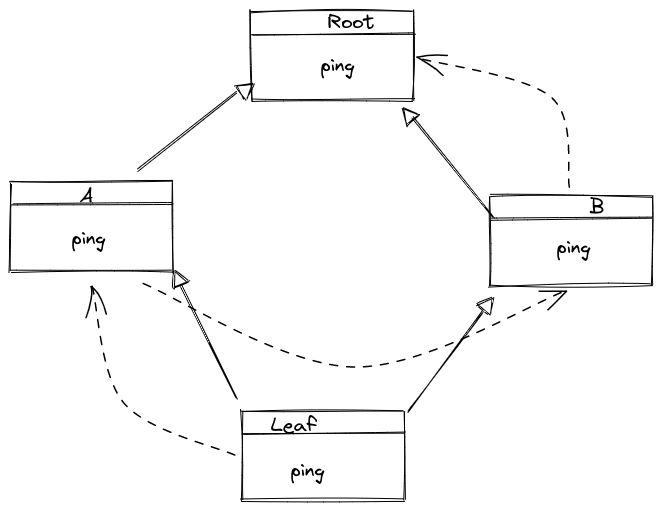

*Activation sequence for leaf1.ping()*
</div>



In [ ]:
class Root:
    def ping(self):
        print(f"{self}.ping() in ROOT")

    def pong(self):
        print(f"{self}.pong() in ROOT")

    def __repr__(self):
        return f"INSTANCE of {type(self).__name__}"

class A(Root):
    def ping(self):
        print(f"{self}.ping() in A")
        super().ping()

    def pong(self):
        print(f"{self}.pong() in A")
        super().pong()

    def __repr__(self):
        return f"INSTANCE of {type(self).__name__}"

class B(Root):
    def ping(self):
        print(f"{self}.ping() in B")
        super().ping()

    def pong(self):
        print(f"{self}.pong() in B")

    def __repr__(self):
        return f"INSTANCE of {type(self).__name__}"


class Leaf(A,B):
    def ping(self):
        print(f"{self}.ping() in Leaf")
        super().ping()


print(Leaf.__mro__)

leaf = Leaf()
leaf.ping()


(<class '__main__.Leaf'>, <class '__main__.A'>, <class '__main__.B'>, <class '__main__.Root'>, <class 'object'>)
INSTANCE of Leaf.ping() in Leaf
INSTANCE of Leaf.ping() in A
INSTANCE of Leaf.ping() in B
INSTANCE of Leaf.ping() in ROOT




<div style="text-align: center;">

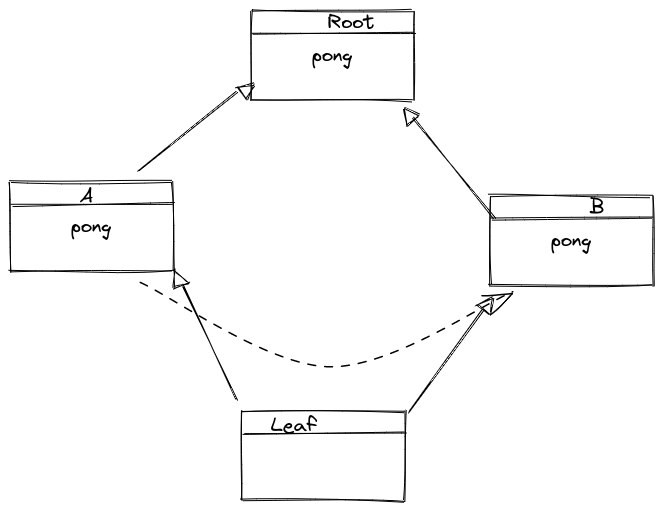

*Activation sequence for leaf1.pong()*
</div>


In [ ]:
print()
leaf.pong()


INSTANCE of Leaf.pong() in A
INSTANCE of Leaf.pong() in B


The activation sequence are determined by two factors:
- The method resolution order of the Leaf class.
- The use of super() in each method.

The __ mro__ attributes holds a tuple of references to the superclasses in method resolution order, from the current class all the way to the object class.
- The MRO is computed by a algorithm called C3. 
- The MRO only determines the activation order, but weather a particular method will be activated in each of the classes depends on weather each implementation calls super() or not.


In [ ]:
class Leaf(B,A):
    def ping(self):
        print(f"{self}.ping() in Leaf")
        super().ping()


print(Leaf.__mro__)

leaf = Leaf()
print()
leaf.pong()

(<class '__main__.Leaf'>, <class '__main__.B'>, <class '__main__.A'>, <class '__main__.Root'>, <class 'object'>)

INSTANCE of Leaf.pong() in B


The MRO takes the order in which superclasses are listed in a subclass declaration into account.
- Therefore, for Leaf(B,A) class B appears before  class A.
- B.pong() would be activated, but A and Root would never run, because B.pong doesn't call super().

- When a method calls super(), it is a *cooperative method*.
- Cooperative methods enable *cooperative multiple inheritance*.
- In order to work, multiple inheritance in Python requires the active cooperation of the methods involved.
- In the B class, ping cooperates, but pong does not.
- A noncooperative method can cause subtle bugs. Many coders may expect that when A.pong calls super().pong(), that will ultimately activate Root.pong().
- Because B.pong() is activated before Root.pong() and does not call super().pong() Root.pong() will never be called.
- Therefore, it is recommended that every method *m* of a nonroot class should call super().m(). 

The interaction of super with the MRO is dynamic. The following example shows a surprising result of this dynamic behavior:

In [ ]:
class U():
    def ping(self):
        print(f'{self}.ping in U')
        super().ping()

    def __repr__(self) -> str:
        return f"{type(self).__name__}"

class LeafUA(A, U):
    def ping(self):
        print(f'{self}.ping in LeafUA')
        super().ping()

# print(LeafUA.__mro__)
print(U.__mro__)
u = U()
u.ping()

leaf2 = LeafUA()
leaf2.ping()

(<class '__main__.U'>, <class 'object'>)
U.ping in U


AttributeError: 'super' object has no attribute 'ping'

In [ ]:
class NewSpam(object):
    pass

NewSpam.__bases__

(object,)

In [ ]:
class NewSpam:
    pass

NewSpam.__bases__ # directly inherit from object

(object,)

In [ ]:
class IntSpam(int):
    pass

IntSpam.__base__.__bases__# indirectly inherit from object

(object,)

The MRO has two classes: U and object. Object has no ping method.

In [ ]:
print(LeafUA.__mro__)
leaf2 = LeafUA()
leaf2.ping()
#LeafUA.__base__.__base__.__base__

(<class '__main__.LeafUA'>, <class '__main__.A'>, <class '__main__.Root'>, <class '__main__.U'>, <class 'object'>)
INSTANCE of LeafUA.ping in LeafUA
INSTANCE of LeafUA.ping() in A
INSTANCE of LeafUA.ping() in ROOT


object

The super.ping() call in LeafUA activates U.ping, which cooperates by calling super().ping() too, activating A.ping, and eventually Root.ping.

In a real program, a class like U  could be a *mixin*: a class intended to be used together with other classes in multiple inheritance, to provide additional functionality.

## Mixin Classes

A mixin class is designed to be subclassed together with at least one other class in multiple inheritance arrangement.

- mixin classes are a convention with no explicit language support in Python.

In [ ]:
class ReprMixin:
    def __repr__(self) -> str:
        return f"{super().__repr__()} Hello world"

import collections

class ReprDict(ReprMixin, collections.UserDict):
    pass

class ReprCounter(ReprMixin, collections.Counter):
    pass

d = ReprDict({'a':1, 'b':2})
c = ReprCounter('Banana')
print(d)
print(c)

{'a': 1, 'b': 2} Hello world
ReprCounter({'a': 3, 'n': 2, 'B': 1}) Hello world


To make it contribute, a mixin usually needs to appear before other classes in the MRO of a subclass that uses it.

## Inheritance vs. Composition
Inheritance models what is called an **is-a** relationship.

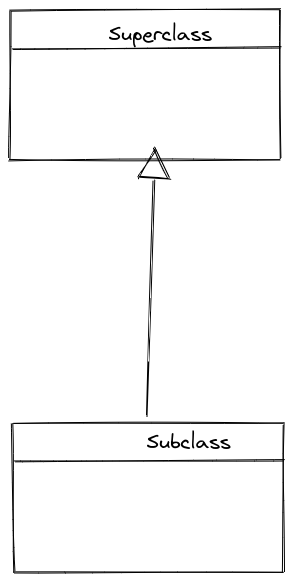

*UML diagram of inheritance*

- Composition is the term used for a HAS-A relationship between classes.

- Classes that contain objects of other classes are usually referred to as *composites*
- classes that are used to create more complex types are referred to as *components*.
- e.g. Composition allows you to express that relationship by saying a Horse **has-a** Tail.

- The composition relation between two classes is considered loosely coupled.
- changes to the component class rarely affect the composite class
- changes to the composite class never affect the component class

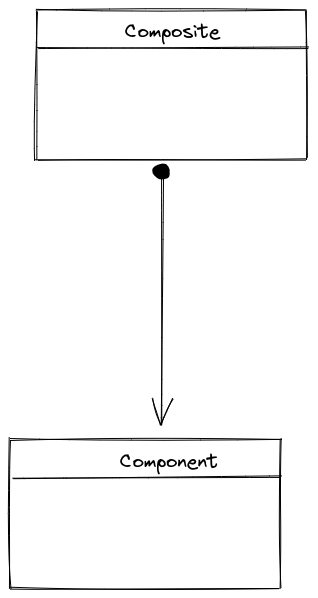

*UML diagram of composition*

In [ ]:
class Address:
    def __init__(self, street, city, state, zipcode, street2=''):
        self.street = street
        self.street2 = street2
        self.city = city
        self.state = state
        self.zipcode = zipcode

    def __str__(self):
        lines = [self.street]
        if self.street2:
            lines.append(self.street2)
        lines.append(f'{self.city}, {self.state} {self.zipcode}')
        return '\n'.join(lines)

In [ ]:
address = Address
address = Address('Johannesstr 33', 'Bielefeld', 'NRW', 33611)
print(address)

Johannesstr 33
Bielefeld, NRW 33611


In [ ]:
class Employee:
    def __init__(self, id, name):
        self.id = id
        self.name = name
        self.address = None

    def get_employee(self):
        print(self.name)
        print(self.address)

In [ ]:
emp1 = Employee(1, 'Bob Doe')
emp1.address = Address('Johannesstr 33', 'Bielefeld', 'NRW', 33611)
emp1.get_employee()

Bob Doe
Johannesstr 33
Bielefeld, NRW 33611


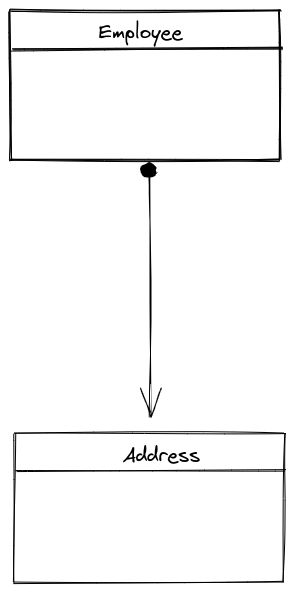

- Composition is more flexible than inheritance because it models a loosely coupled relationship. 
- Designs based on composition are more suitable to change.

# Enum

- An Enum is a set of symbolic names bound to unique values.

- Enums are like global variables but offer more features.

In [ ]:
from enum import Enum
from datetime import datetime


from enum import Enum
class Weekday(Enum):
    MONDAY = 1
    TUESDAY = 2
    WEDNESDAY = 3
    THURSDAY = 4
    FRIDAY = 5
    SATURDAY = 6
    SUNDAY = 7


In [ ]:
Weekday(1)

<Weekday.MONDAY: 1>

In [ ]:
Weekday.THURSDAY

<Weekday.THURSDAY: 4>

In [ ]:
Weekday.TUESDAY.name

'TUESDAY'

In [ ]:
Weekday.WEDNESDAY.value

3

In [ ]:
class Weekday(Enum):
    MONDAY = 1
    TUESDAY = 2
    WEDNESDAY = 3
    THURSDAY = 4
    FRIDAY = 5
    SATURDAY = 6
    SUNDAY = 7

    @classmethod
    def from_date(cls, date):
        return cls(date.isoweekday())

In [ ]:
from datetime import date
now = date.today()
now.isoweekday()

4

In [ ]:
from datetime import date

Weekday.from_date(date.today())

<Weekday.THURSDAY: 4>